In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=8bafb80b294ec1c07c44e90366e4bfe5ed91d6b1e8c363db2087d45941b1fbb5
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


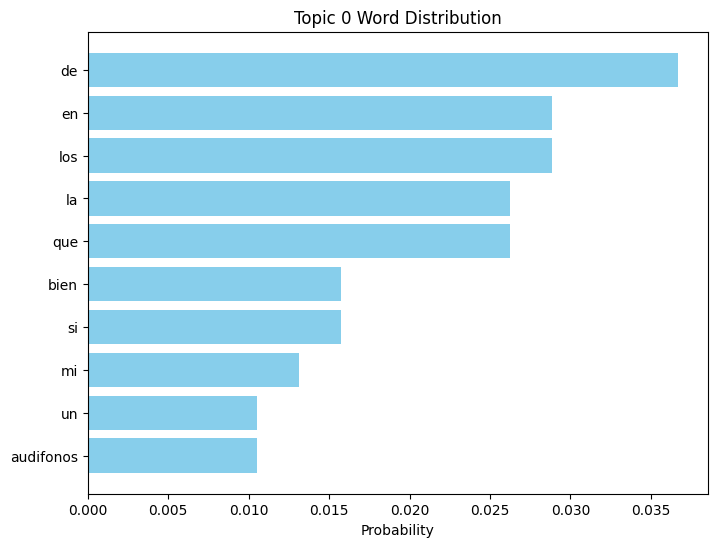

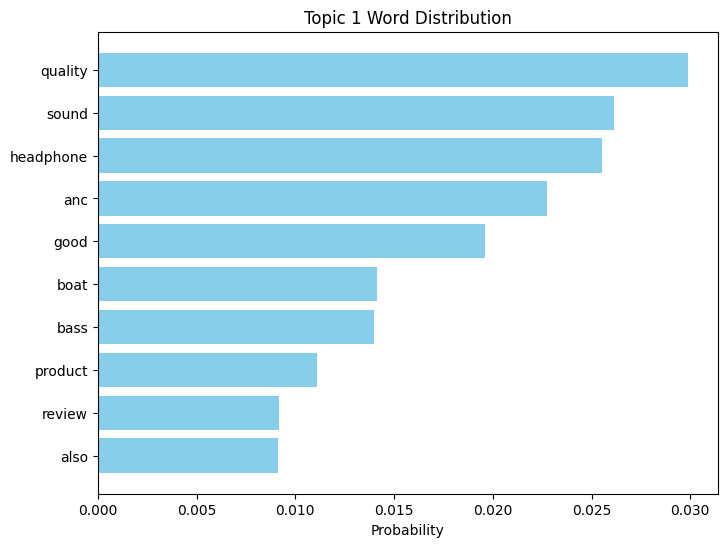

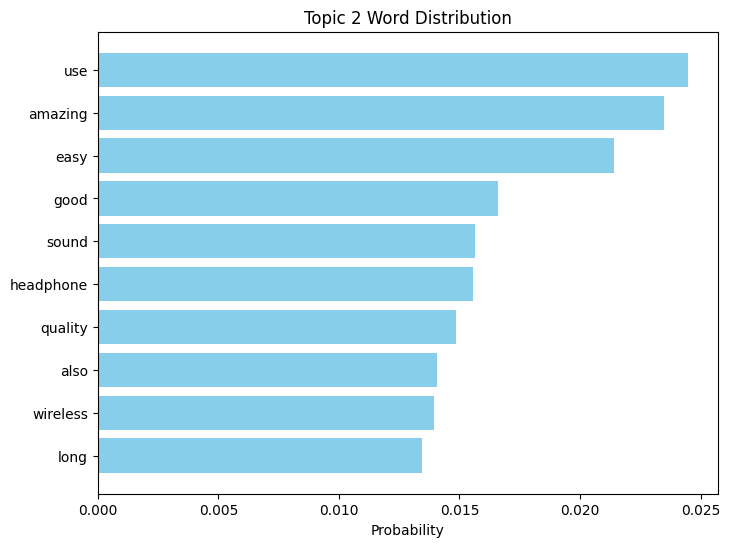

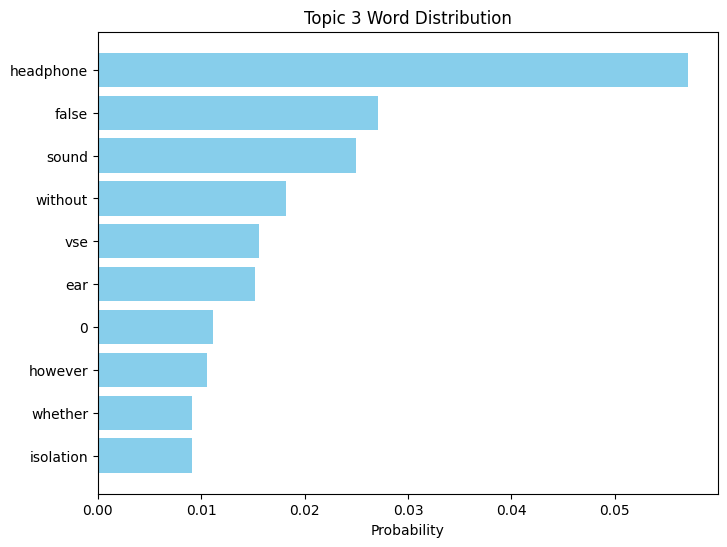

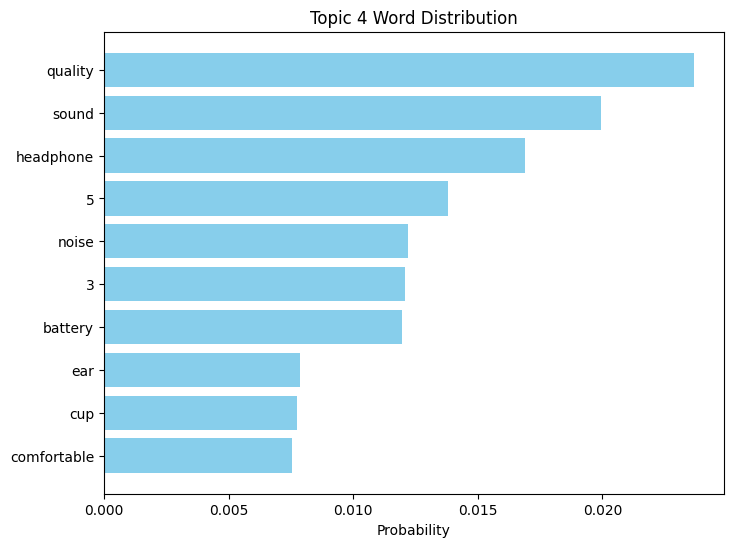

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from gensim import corpora, models
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

# Load NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load data
data = pd.read_csv('reviews.csv')

# Tokenization and preprocessing
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def process_text(text):
    tokens = tokenizer.tokenize(text.lower())  # Tokenization
    tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatization

    # Language detection
    try:
        tokens = [token for token in tokens if detect(token) == 'en']  # Filter out non-English words
    except LangDetectException:
        pass  # Skip language detection if error occurs

    return tokens

processed_docs = data['Review'].map(process_text)

# Create dictionary and document-term matrix
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Build LDA model
num_topics = 5  # You can adjust this value based on your dataset
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Plotting topic distributions
for i in range(num_topics):
    topic_words = lda_model.show_topic(i, topn=10)  # Get the top 10 words for the topic
    words = [word[0] for word in topic_words]
    probabilities = [word[1] for word in topic_words]
    plt.figure(figsize=(8, 6))
    plt.barh(words, probabilities, color='skyblue')
    plt.xlabel('Probability')
    plt.title('Topic {} Word Distribution'.format(i))
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest probability at the top
    plt.show()


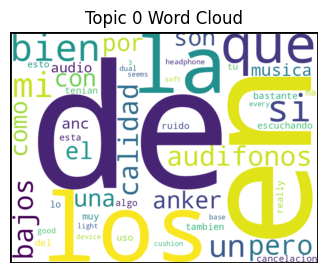

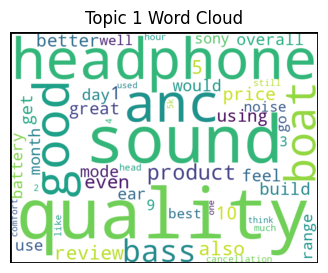

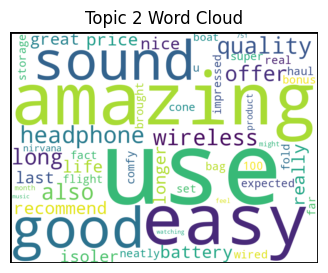

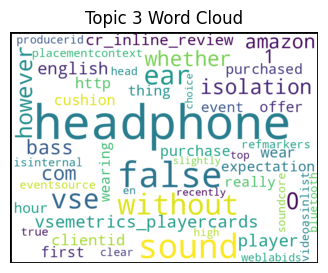

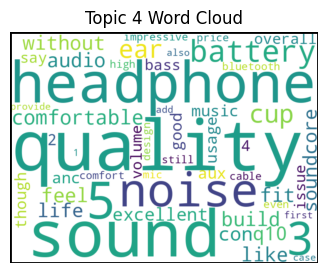

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

# Plotting topic distributions using word clouds with bounding box
for i in range(num_topics):
    topic_words = lda_model.show_topic(i, topn=50)  # Increase the number of words for better representation
    words_dict = {word[0]: word[1] for word in topic_words}

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(words_dict)

    # Plot the word cloud with a bounding box
    plt.figure(figsize=(6, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.gca().add_patch(plt.Rectangle((0, 0), 800, 600, linewidth=2, edgecolor='black', fill=False))  # Add a bounding box
    plt.axis('off')
    plt.title('Topic {} Word Cloud'.format(i))
    plt.show()
